#17-1-1 標準化

170500096/170498071 [==============================] - 6s 0us/step


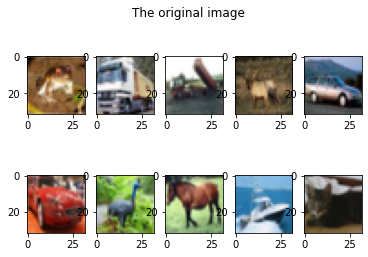

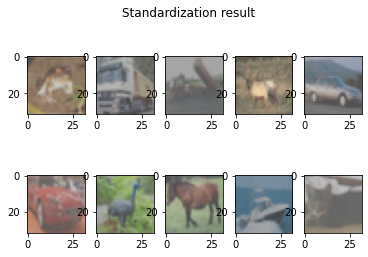

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
plt.suptitle('The original image', fontsize=12)
plt.show()

# 建立 ImageDataGenerator 的操作物件
datagen = ImageDataGenerator(samplewise_center=True, 
                samplewise_std_normalization=True)

# 進行標準化
g = datagen.flow(X_train, y_train, shuffle=False)
X_batch, y_batch = g.next()

# 讓生成的圖像效果, 看起來更明顯
X_batch *= 127.0 / max(abs(X_batch.min()), X_batch.max())
X_batch += 127.0
X_batch = X_batch.astype('uint8')

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_batch[i])
plt.suptitle('Standardization result', fontsize=12)
plt.show()

#17-1-2 白化

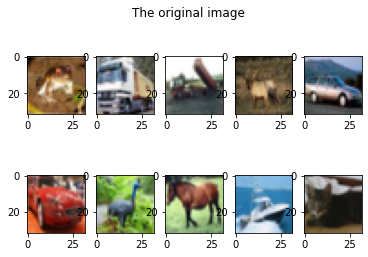

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


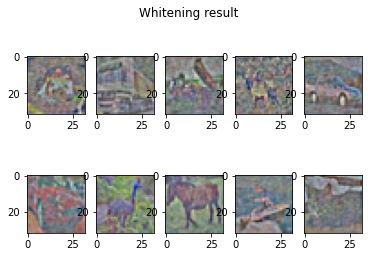

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train[:300]
X_test = X_test[:100]
y_train = y_train[:300]
y_test = y_test[:100]

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
plt.suptitle('The original image', fontsize=12)
plt.show()

# 建立ImageDataGenerator的操作物件
datagen = ImageDataGenerator(zca_whitening=True)

# 白化處理
datagen.fit(X_train)
g = datagen.flow(X_train, y_train, shuffle=False)
X_batch, y_batch = g.next()

# 讓生成的圖像效果, 看起來更明顯
X_batch *= 127.0 / max(abs(X_batch.min()), abs(X_batch.max()))
X_batch += 127
X_batch = X_batch.astype('uint8')

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_batch[i])
plt.suptitle('Whitening result', fontsize=12)
plt.show()

# 17-1-3 批次正規化

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/3
1875/1875 [==============================] - 44s 8ms/step - loss: 0.4782 - accuracy: 0.8717 - val_loss: 0.0915 - val_accuracy: 0.9758
Epoch 2/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1106 - accuracy: 0.9699 - val_loss: 0.0591 - val_accuracy: 0.9838
Epoch 3/3
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0729 - accuracy: 0.9806 - val_loss: 0.0469 - val_accuracy: 0.9857


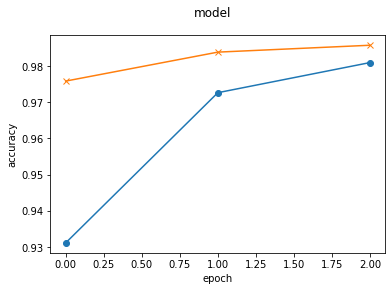

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Conv2D, Dense, Flatten, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.reshape(a=X_train, newshape=(-1,28,28,1))
X_test = np.reshape(a = X_test,newshape=(-1,28,28,1))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


# 使用 ReLU 函數當做啟動函數
model = Sequential()
model.add(Conv2D(input_shape=(28, 28, 1), filters=32,
                 kernel_size=(2, 2), strides=(1, 1), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(
    2, 2), strides=(1, 1), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256))
# 批次正規化
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(128))
# 批次正規化
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

# 執行compile
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
# 執行訓練
history = model.fit(X_train, y_train, batch_size=32, epochs=3, 
                     validation_data=(X_test, y_test))

# 做可視化處理
plt.plot(history.history['accuracy'], label='acc', ls='-', marker='o')
plt.plot(history.history['val_accuracy'], label='val_acc', ls='-', 
         marker='x')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.suptitle("model", fontsize=12)
plt.show()

#17-2 遷移學習

Epoch 1/5
1563/1563 [==============================] - 16s 10ms/step - loss: 1.7004 - accuracy: 0.4084 - val_loss: 1.2375 - val_accuracy: 0.5695
Epoch 2/5
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3102 - accuracy: 0.5388 - val_loss: 1.1928 - val_accuracy: 0.5803
Epoch 3/5
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2619 - accuracy: 0.5576 - val_loss: 1.1648 - val_accuracy: 0.5933
Epoch 4/5
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2362 - accuracy: 0.5647 - val_loss: 1.1588 - val_accuracy: 0.5940
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 1.1421 - accuracy: 0.6007
Test loss: 1.142104148864746
Test accuracy: 0.6007000207901001


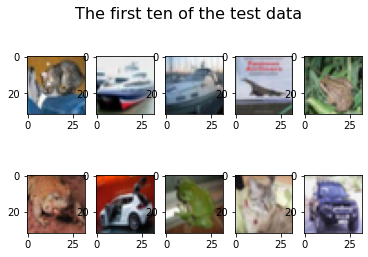

[6 8 8 1 6 6 3 6 3 7]


In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 定義輸入形式
input_tensor = Input(shape=(32, 32, 3))
vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

top_model = vgg16.output
top_model = Flatten(input_shape=vgg16.output_shape[1:])(top_model)
top_model = Dense(256, activation='sigmoid')(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(10, activation='softmax')(top_model)

# 將vgg16和top_model做連接, 建構出 model 模型
model = Model(inputs=vgg16.input, outputs=top_model)

# 將前19層的權重固定住, 不做訓練
for layer in model.layers[:19]:
    layer.trainable = False


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# 訓練批量是32, epoch是3
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=5)

# 評估準確度
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


# 對前10張做可視化處理
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i])
plt.suptitle("The first ten of the test data",fontsize=16)
plt.show()

# 前10張的預測結果
pred = np.argmax(model.predict(X_test[0:10]), axis=1)
print(pred)
